## 📌 Problem Statement
The company wants to test if the **average cart value** this month is greater than ₹1500 using a **One-Sample Z-Test**. This is critical to assess the success of new marketing campaigns.

## 🧠 5W1H

- **What**: Cart Value (₹) — Target Benchmark = ₹1500
- **Why**: To validate revenue growth from campaigns
- **When**: This month's transactions
- **Where**: Across States, Platforms (Web, Mobile), and User Types (New, Returning)
- **Who**: 2,000 random transactions
- **How**: One-Sample Z-Test (population std dev known = ₹300)


In [4]:
import numpy as np
import pandas as pd

np.random.seed(2025)

# Parameters
n = 2000
mu_benchmark = 1500
sigma_population = 300

# Simulated fields
states = ['Maharashtra', 'Karnataka', 'Delhi', 'Gujarat', 'Tamil Nadu']
platforms = ['Mobile', 'Web']
user_types = ['New', 'Returning']

df = pd.DataFrame({
    'Transaction_ID': np.arange(1, n + 1),
    'State': np.random.choice(states, n),
    'Platform': np.random.choice(platforms, n),
    'User_Type': np.random.choice(user_types, n),
    'Cart_Value': np.random.normal(loc=1530, scale=sigma_population, size=n)
})

df.head()


,Transaction_ID,State,Platform,User_Type,Cart_Value
0,1,Delhi,Web,Returning,1290.305865
1,2,Tamil Nadu,Mobile,Returning,1511.978397
2,3,Maharashtra,Web,New,1516.366852
3,4,Gujarat,Web,New,1461.818823
4,5,Gujarat,Web,New,1548.805315


Transaction_ID    0
State             0
Platform          0
User_Type         0
Cart_Value        0
dtype: int64
       Transaction_ID   Cart_Value
count     2000.000000  2000.000000
mean      1000.500000  1541.883163
std        577.494589   298.301729
min          1.000000   485.503157
25%        500.750000  1340.604109
50%       1000.500000  1538.376946
75%       1500.250000  1739.210782
max       2000.000000  2457.800673


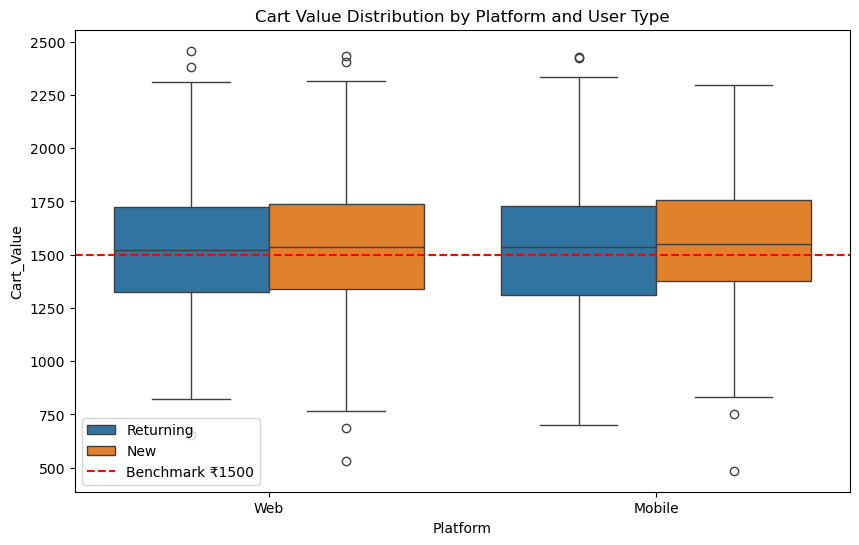

In [6]:
# Check missing values
print(df.isnull().sum())

# Summary
print(df.describe())

# EDA: Cart Value by Platform & User Type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Platform', y='Cart_Value', hue='User_Type')
plt.axhline(1500, color='red', linestyle='--', label='Benchmark ₹1500')
plt.title('Cart Value Distribution by Platform and User Type')
plt.legend()
plt.show()


In [8]:
from statsmodels.stats.weightstats import ztest

# Z-Test: Is avg cart value > ₹1500?
z_stat, p_value = ztest(df['Cart_Value'], value=1500, alternative='larger')

print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


Z-Statistic: 6.2791
P-Value: 0.0000


## 📊 Hypothesis

- H₀: μ = ₹1500 → No increase in average cart value
- H₁: μ > ₹1500 → Cart value **has** increased

### 🔍 Interpretation

- If **p < 0.05** → Reject H₀ → Campaign worked, cart value increased significantly
- If **p ≥ 0.05** → Fail to reject H₀ → No strong evidence of improvement

## 💼 Business Impact

- ✅ Significant increase: Scale up successful strategies, especially in high-performing states/platforms
- ❌ No increase: Reassess pricing, product bundling, or campaign targeting by user segments
